In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
import seaborn as sns
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
filterwarnings('ignore')

In [2]:
ad = pd.read_csv('adverts.csv')
df = ad.copy()
df = df.drop_duplicates() #remove duplicates row

In [3]:
#Fill null variable.

In [4]:
df.isna().sum()

Net Square Meter                   0
Number of Rooms                    0
Floor Number                     899
Heating Type                       0
Credit Eligibility                 0
Number of Bathrooms                0
Number of WC                    8821
Gross Square Meter                 0
Building Age                       0
Number of Floors in Building       0
Within Site                        0
Balcony                         8380
house is furnished              4371
Price                              0
Location                           0
dtype: int64

In [5]:
df[['Number of WC', 'Balcony','Floor Number']] = df[['Number of WC', 'Balcony','Floor Number']].fillna(0)

In [6]:
df['house is furnished'] = df['house is furnished'].fillna('Boş')
df.isna().sum()

Net Square Meter                0
Number of Rooms                 0
Floor Number                    0
Heating Type                    0
Credit Eligibility              0
Number of Bathrooms             0
Number of WC                    0
Gross Square Meter              0
Building Age                    0
Number of Floors in Building    0
Within Site                     0
Balcony                         0
house is furnished              0
Price                           0
Location                        0
dtype: int64

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df['Location'].str.split(' - ').str[0].str.strip()

0        İstanbul
1        İstanbul
2        İstanbul
3        İstanbul
4        İstanbul
           ...   
10563    İstanbul
10564    İstanbul
10565    İstanbul
10566    İstanbul
10567    İstanbul
Name: Location, Length: 10568, dtype: object

In [9]:
#I want to analyze only Istanbul so, i will remove other city from df
df.groupby(df['Location'].str.split(' - ').str[0].str.strip()).size()

Location
Adana                9
Adıyaman             2
Amasya               1
Ankara              56
Antalya             19
Aydın               36
Ağrı                 1
Balıkesir           38
Batman               1
Bayburt              1
Bolu                 1
Bursa                8
Denizli             18
Diyarbakır           4
Elazığ               2
Eskişehir            6
Gaziantep            7
Giresun              3
Hatay                1
Isparta              1
KKTC                 1
Kahramanmaraş        4
Karaman              3
Kayseri             12
Kocaeli              6
Konya               10
Kırklareli           4
Malatya              1
Manisa               6
Mardin               1
Mersin               7
Muğla                4
Nevşehir             1
Sakarya             10
Samsun               5
Sivas                2
Tekirdağ            23
Tokat                1
Trabzon              6
Yalova               2
Çanakkale            1
İstanbul         10194
İzmir               37
Şa

In [10]:
df = df[df["Location"].str.split(' - ').str[0].str.strip() == 'İstanbul']
df.groupby(df['Location'].str.split(' - ').str[0].str.strip()).size()

Location
İstanbul    10194
dtype: int64

In [11]:
def describe_column_values(df):
    for column in df.columns:
        unique_values = df[column].unique()  
        num_unique = len(unique_values)
        
        sample_values = ', '.join(map(str, unique_values[:5]))
        print(f"{column} column {num_unique} contains unique values. For example: {sample_values}")
        
describe_column_values(df)

Net Square Meter column 358 contains unique values. For example: 105 m², 300 m², 305 m², 78 m², 70 m²
Number of Rooms column 34 contains unique values. For example: 4+1, 7+3, 6+3, 2+1, 4+2
Floor Number column 50 contains unique values. For example: 3.Kat, 0, 2.Kat, Yüksek Giriş, 1.Kat
Heating Type column 20 contains unique values. For example: Klimalı, Kombi Doğalgaz, Sobalı, Yerden Isıtma, Merkezi Doğalgaz
Credit Eligibility column 3 contains unique values. For example: Krediye Uygun, Krediye Uygun Değil, Bilinmiyor
Number of Bathrooms column 7 contains unique values. For example: 2, 3, 5, 1, Yok
Number of WC column 8 contains unique values. For example: 0, 2, 1, 6+, 3
Gross Square Meter column 432 contains unique values. For example: 168 m², 385 m², 380 m², 90 m², 78 m²
Building Age column 9 contains unique values. For example: 21 Ve Üzeri, 16-20, 0 (Yeni), 5-10, 11-15
Number of Floors in Building column 46 contains unique values. For example: 3, 2, 4, 5, 6
Within Site column 2 conta

In [12]:
df.head()

,Net Square Meter,Number of Rooms,Floor Number,Heating Type,Credit Eligibility,Number of Bathrooms,Number of WC,Gross Square Meter,Building Age,Number of Floors in Building,Within Site,Balcony,house is furnished,Price,Location
0,105 m²,4+1,3.Kat,Klimalı,Krediye Uygun,2,0,168 m²,21 Ve Üzeri,3,Hayır,0,Boş,17.500.000,İstanbul - Adalar - Nizam Mh.
1,300 m²,7+3,0,Kombi Doğalgaz,Krediye Uygun,3,0,385 m²,16-20,2,Hayır,0,Boş,38.000.000,İstanbul - Adalar - Nizam Mh.
2,305 m²,6+3,0,Kombi Doğalgaz,Krediye Uygun,5,0,380 m²,21 Ve Üzeri,2,Hayır,0,Eşyalı,30.500.000,İstanbul - Adalar - Heybeliada Mh.
3,78 m²,2+1,2.Kat,Kombi Doğalgaz,Krediye Uygun,1,0,90 m²,0 (Yeni),3,Hayır,0,Boş,3.500.000,İstanbul - Arnavutköy - Mustafa Kemal Paşa Mh.
4,70 m²,2+1,2.Kat,Kombi Doğalgaz,Krediye Uygun,1,0,78 m²,0 (Yeni),4,Hayır,0,Boş,2.650.000,İstanbul - Arnavutköy - Boğazköy İstiklal Mh.


In [13]:
df['Net Square Meter'] = df['Net Square Meter'].str.replace(' m²', '')
df["Net Square Meter"] = df["Net Square Meter"].str.replace('.', '').astype(int)

In [14]:
floor_mapping = {
    'Düz Giriş (Zemin)': 0,
    'Bahçe Dublex': -2,
    'Bahçe Katı': -1,
    'Bodrum Kat': -1,
    'Müstakil': 0,
    'Villa Tipi': 1,
    'Yüksek Giriş': 0.5,
    'Çatı Dubleks': 2,
    'Çatı Katı': 3,
    'Kot 1 (-1).Kat': -1,
    'Kot 2 (-2).Kat': -2,
    'Kot 3 (-3).Kat': -3,
    'Kot 4 (-4).Kat': -4
}

def parse_floor_number(x):
    if isinstance(x, str):
        # Sözlükten değer bulma
        if x in floor_mapping:
            return floor_mapping[x]
        
        # Negatif ve pozitif sayıları bulma
        match = re.search(r'(-?\d+)', x)
        if match:
            return float(match.group(0))  # Negatif sayıları da destekler
    return 0

df['Floor Number'] = df['Floor Number'].apply(parse_floor_number)

In [15]:
df['Heating Type'] = df['Heating Type'].astype('category')

In [16]:
df['Credit Eligibility'] = df['Credit Eligibility'].replace('Bilinmiyor','Krediye Uygun Değil')
df['Credit Eligibility'] = df['Credit Eligibility'].map({'Krediye Uygun': 1, 'Krediye Uygun Değil': 0}).astype(int)

In [17]:
df['Gross Square Meter'] = df['Gross Square Meter'].str.replace(' m²', '')
df['Gross Square Meter'] = df['Gross Square Meter'].str.replace('.', '').astype(int)

In [18]:
df['Price'] = df['Price'].str.replace('.', '', regex=False).astype(np.int64)

In [19]:
#We are removing that data because those who mark the toilet as 'Yok' are selling buildings, not flats.
df.drop(df[(df['Number of Bathrooms'] == 'Yok') & (df['Number of WC'] != '1')].index, inplace=True)

In [20]:
df['Number of Bathrooms'] = df['Number of Bathrooms'].replace("Yok",'0')
df['Number of Bathrooms'] = df['Number of Bathrooms'].replace('6+', 7).astype(int)

In [21]:
df['Number of WC'] = df['Number of WC'].replace("Yok",'0')
df['Number of WC'] = df['Number of WC'].replace('6+', 7).astype(int)

In [22]:
#Function to calculate the number of rooms numerically
def parse_room_count(x):
    if 'Stüdyo' in x:
        return 1  # Studio is generally considered 1 room
    elif 'Oda' in x:
        # '+' clear the sign and convert the first number to float
        return float(x.split()[0].replace('+', ''))
    else:
        # '+' clear sign, convert numbers to float and sum
        return sum(map(float, x.replace('+', ' ').split()))


df['Number of Rooms'] = df['Number of Rooms'].apply(parse_room_count)

In [23]:
def map_building_age(age_str):
    age_mapping = {
        '0 (Yeni)': 0,
        '1': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5-10': 7.5,  #average
        '11-15': 13,  # average
        '16-20': 18,  # average
        '21 Ve Üzeri': 25
    }
    
    return age_mapping.get(age_str, None)
    
df['Building Age'] = df["Building Age"].apply(map_building_age).astype(int)

In [24]:
df['Within Site'] = df['Within Site'].map({'Evet':'1', 'Hayır':'0'}).astype(int)

In [25]:
df['Balcony'] = df['Balcony'].replace(0,'Yok')
df['Balcony'] = df['Balcony'].map({'Var': '1', 'Yok':'0'}).astype(int)

In [26]:
df['house is furnished'] = df['house is furnished'].map({'Boş':'0', 'Eşyalı':'1'}).astype(int)

In [27]:
df["Number of Floors in Building"] = df['Number of Floors in Building'].astype('int32')

In [28]:
df['District'] = df['Location'].str.split('-').str[1]
df['Neighbourhood'] = df['Location'].str.split('-').str[2]
df['Neighbourhood'] = df['Neighbourhood'].replace('Mh.','')
df = df.drop(columns=['Location'])

In [29]:
df['Neighbourhood'] = df['Neighbourhood'].astype('category')
df['District'] = df['District'].astype('category')

In [30]:
#Now we have to turn category into int or float type.
#There is a Strong Relationship with the Target Variable: Target Encoding would be the most appropriate method.

In [31]:
while True:
    Q1 = df['Price'].quantile(0.25)
    Q3 = df['Price'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]
    if outliers.empty:
        break
    else:
        df.drop(outliers.index, inplace=True)
        df.reset_index(drop=True, inplace=True)
outliers.sort_values(by = 'Price', ascending=False)

,Net Square Meter,Number of Rooms,Floor Number,Heating Type,Credit Eligibility,Number of Bathrooms,Number of WC,Gross Square Meter,Building Age,Number of Floors in Building,Within Site,Balcony,house is furnished,Price,District,Neighbourhood


In [32]:
df['Z-Score'] = stats.zscore(df['Price'])
outliers_zscore = df[(df['Z-Score'].abs() > 3)]
outliers_zscore.sort_values(by = 'Z-Score', ascending=False)[0:50]
outliers_zscore
#df.drop(columns="Z-Score", inplace=True)

,Net Square Meter,Number of Rooms,Floor Number,Heating Type,Credit Eligibility,Number of Bathrooms,Number of WC,Gross Square Meter,Building Age,Number of Floors in Building,Within Site,Balcony,house is furnished,Price,District,Neighbourhood,Z-Score


In [33]:
df[(df['Number of Bathrooms'] == 0 ) & (df['Number of WC'] == 0)]

,Net Square Meter,Number of Rooms,Floor Number,Heating Type,Credit Eligibility,Number of Bathrooms,Number of WC,Gross Square Meter,Building Age,Number of Floors in Building,Within Site,Balcony,house is furnished,Price,District,Neighbourhood,Z-Score


In [34]:
df.drop(df[df['Price']<100000].index, inplace=True)

In [35]:
df['Price'].sort_values(ascending=False)

1065    9500000
3599    9500000
7424    9500000
8049    9500000
4405    9500000
         ...   
1909     220000
5231     210000
5625     165000
2545     160000
5755     130000
Name: Price, Length: 8200, dtype: int64

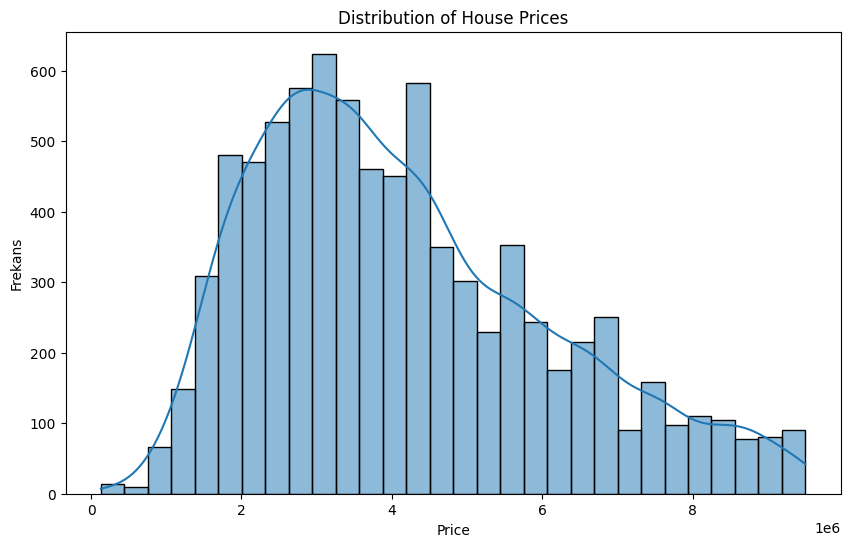

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frekans')
plt.show()

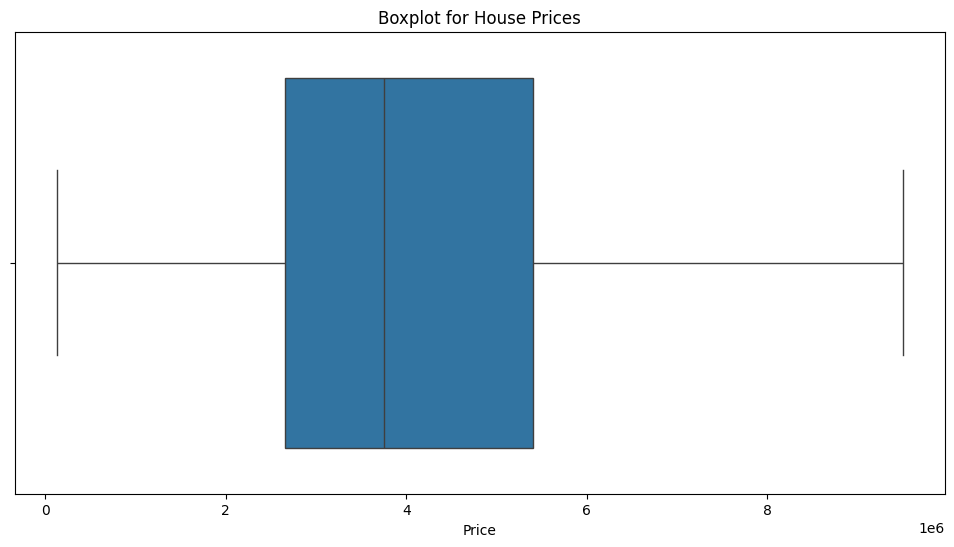

In [37]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot for House Prices')
plt.xlabel('Price')
plt.show()

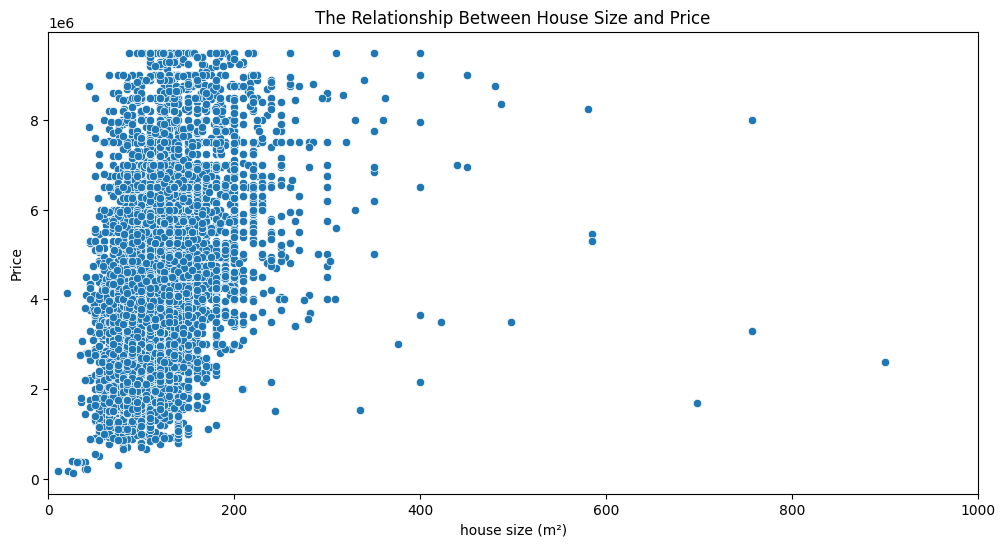

In [38]:
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Gross Square Meter'], y=df['Price'])
plt.title('The Relationship Between House Size and Price')
plt.xlabel('house size (m²)')
plt.ylabel('Price')
plt.xlim(0,1000)
plt.show()

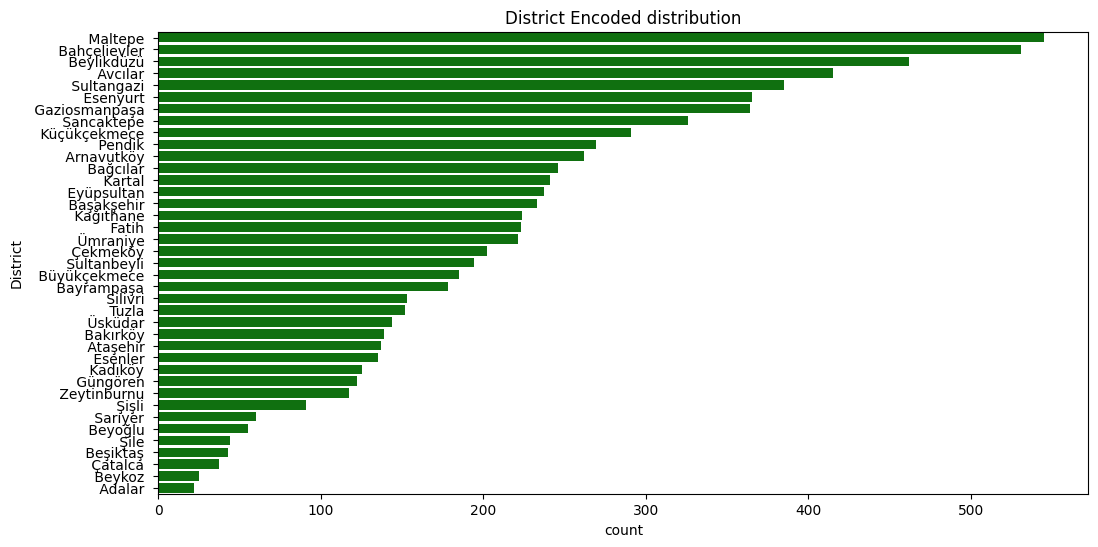

In [39]:
# ilan sayisi
plt.figure(figsize=(12,6))
sns.countplot(data=df , y="District",#hue='District',
             order=df['District'].value_counts().index,
             color='green')

plt.title("District Encoded distribution")
plt.show()

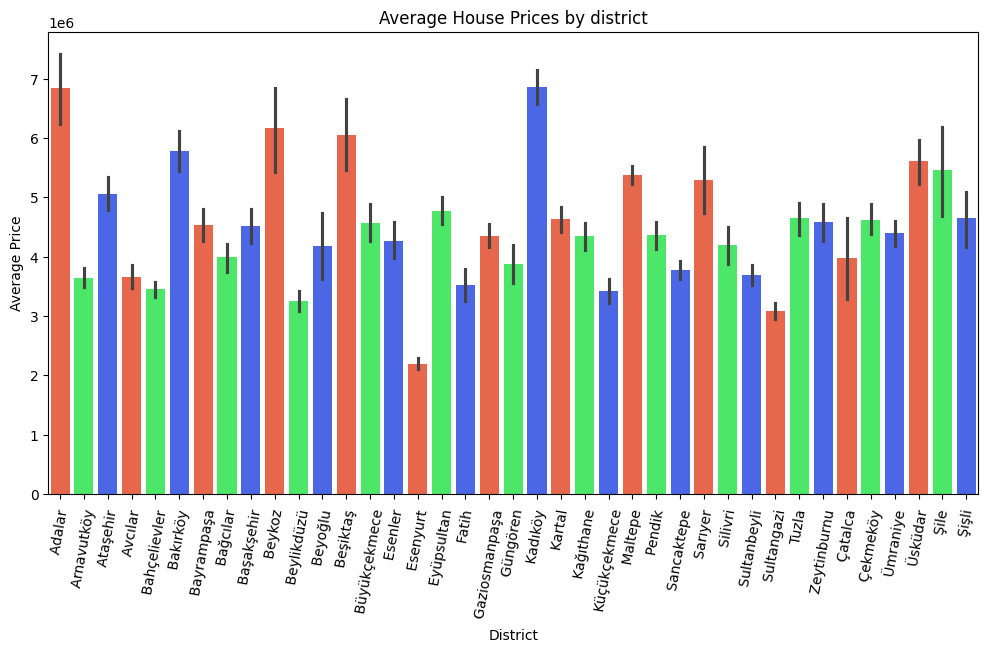

In [40]:
# The Effect of Categorical Features on Price
#As someone who lives in Istanbul, I have to say that it is a very successful painting.
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='Price', data=df, palette=['#FF5733', '#33FF57', '#3357FF'])
plt.xticks(rotation=80)
plt.title('Average House Prices by district')
plt.xlabel('District')
plt.ylabel('Average Price')
plt.color_sequences
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8200 entries, 0 to 8222
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Net Square Meter              8200 non-null   int32   
 1   Number of Rooms               8200 non-null   float64 
 2   Floor Number                  8200 non-null   float64 
 3   Heating Type                  8200 non-null   category
 4   Credit Eligibility            8200 non-null   int32   
 5   Number of Bathrooms           8200 non-null   int32   
 6   Number of WC                  8200 non-null   int32   
 7   Gross Square Meter            8200 non-null   int32   
 8   Building Age                  8200 non-null   int32   
 9   Number of Floors in Building  8200 non-null   int32   
 10  Within Site                   8200 non-null   int32   
 11  Balcony                       8200 non-null   int32   
 12  house is furnished            8200 non-null   int32  

In [42]:
#Target Encoding for Heating Type, District and Neighbourhood
train, test = train_test_split(df, test_size=0.2, random_state=42)
train_encoded = train.copy()

In [43]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# K-fold cross-validation for avoid target leakage
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in kf.split(train):
    train_part, val_part = train.iloc[train_idx], train.iloc[val_idx]
    
    mean_heating = train_part.groupby('Heating Type')['Price'].mean()
    mean_district = train_part.groupby("District")['Price'].mean()
    mean_neighbourhood = train_part.groupby("Neighbourhood")['Price'].mean()

    #print( val_part['Heating Type'].map(mean_heating)) #float
    #print( val_part['District'].map(mean_district)) #category i dont know, why this attribute retun as a category
    #print( val_part['Neighbourhood'].map(mean_neighbourhood)) #float
    
    train_encoded.loc[val_part.index, 'Heating Type Encoded'] = val_part['Heating Type'].map(mean_heating)
    train_encoded.loc[val_part.index, 'Neighbourhood Encoded'] = val_part['Neighbourhood'].map(mean_neighbourhood)
    #if i don't add astype(flaot) to the end of the below line, i get this error:
    #AssertionError: Something has gone wrong, please report a bug at https://github.com/pandas-dev/pandas/issues
    train_encoded.loc[val_part.index, 'District Encoded'] = val_part['District'].map(mean_district).astype(float)


median_value = train_encoded['District Encoded'].median()
train_encoded['District Encoded'].fillna(median_value, inplace=True)

median_value = train_encoded['Neighbourhood Encoded'].median()
train_encoded['Neighbourhood Encoded'].fillna(median_value, inplace=True)

median_value = train_encoded['Heating Type Encoded'].median()
train_encoded['Heating Type Encoded'].fillna(median_value, inplace=True)

In [44]:
test['Heating Type Encoded'] = test['Heating Type'].map(mean_heating)
test['District Encoded'] = test['District'].map(mean_district)
test['Neighbourhood Encoded'] = test['Neighbourhood'].map(mean_neighbourhood)

default_value = mean_heating.median() 
test['Heating Type Encoded'].fillna(default_value, inplace=True)

default_value = mean_district.median() 
test['District Encoded'].fillna(default_value, inplace=True)
test['District Encoded'] = test['District Encoded'].astype(float)

default_value = mean_neighbourhood.median() 
test['Neighbourhood Encoded'].fillna(default_value, inplace=True)

In [45]:
df.loc[train_encoded.index, 'Heating Type Encoded'] = train_encoded['Heating Type Encoded']
df.loc[test.index, 'Heating Type Encoded'] = test['Heating Type Encoded']

df.loc[train_encoded.index, 'District Encoded'] = train_encoded['District Encoded']
df.loc[test.index, 'District Encoded'] = test['District Encoded']

df.loc[train_encoded.index, 'Neighbourhood Encoded'] = train_encoded['Neighbourhood Encoded']
df.loc[test.index, 'Neighbourhood Encoded'] = test['Neighbourhood Encoded']

In [46]:
df.drop(columns=['District','Neighbourhood', 'Heating Type','Z-Score'], inplace=True)

### You can use this otomaticly

In [47]:
#from sklearn.preprocessing import TargetEncoder
#enc_auto = TargetEncoder(smooth="auto",target_type='continuous')
## The target variable is the price
#target = df['Price']
## The features are the model and manufacturer
#features = df[['Heating Type', 'District','Neighbourhood']]
#
#X_trans = pd.DataFrame()
#X_trans[['Heating Type', 'District','Neighbourhood']] = pd.DataFrame(enc_auto.fit_transform(features, target))
#X_train = pd.concat([df.drop(['Heating Type', 'District','Neighbourhood'], axis=1), X_trans], axis=1)

In [48]:
df.reset_index(drop=True, inplace=True)
df.to_csv('clean_adverts.csv')